<a href="https://colab.research.google.com/github/iampawansingh/landmark_detection/blob/main/landmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernible landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<!-- <img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/> -->

<img src="https://drive.google.com/uc?id=1GRibJpQni9M-cf1my-ehvGDzFko6pw0Q" alt="Bird in Haleakalā National Park" style="width: 400px;" />

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/nd101-c2-landmarks-starter/

/content/drive/MyDrive/nd101-c2-landmarks-starter


In [3]:
%cd landmark_project/
# %mkdir landmark_images
%cd landmark_images

/content/drive/MyDrive/nd101-c2-landmarks-starter/landmark_project
/content/drive/MyDrive/nd101-c2-landmarks-starter/landmark_project/landmark_images


In [4]:
# !wget -c https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip

In [5]:
# !unzip landmark_images.zip

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [6]:
!pwd

/content/drive/MyDrive/nd101-c2-landmarks-starter/landmark_project/landmark_images


In [7]:

# !ls -l landmark_images

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torchvision import transforms
from pathlib import Path
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import random

In [9]:
def seed_all(seed):
    if not seed:
        seed = 10

    print("[ Using Seed : ", seed, " ]")

    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_all(100)

[ Using Seed :  100  ]


In [10]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    numpy.random.seed(worker_seed)
    random.seed(worker_seed)

In [11]:
# define few essentials stuffs
batch_size = 32
valid_size = 0.2


In [12]:
image_dir = Path(".").resolve()

In [13]:
image_dir

PosixPath('/content/drive/MyDrive/nd101-c2-landmarks-starter/landmark_project/landmark_images')

In [14]:
train_dir = image_dir / "train"
test_dir = image_dir / "test"

In [15]:
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]

In [16]:
# Defining transforms for train
train_transform = transforms.Compose([transforms.Resize(224), 
                                    #   transforms.RandomRotation(90),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                    #  transforms.Normalize(imagenet_mean,
                                    #                      imagenet_std)
                                    ])

test_transform = transforms.Compose([transforms.Resize(224),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                    #  transforms.Normalize(imagenet_mean,
                                    #                       imagenet_std)
                                     ])

In [17]:
train_dataset = ImageFolder(train_dir, transform=train_transform)
test_dataset = ImageFolder(test_dir, transform=train_transform)

In [18]:
# Get mapping from folder to classes
landmark_mapping= {values: key.split(".")[-1]  for key, values in train_dataset.class_to_idx.items()}

In [19]:
# landmark_mapping

In [20]:
# obtain indexes for train and valid data
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.seed(100)
np.random.shuffle(indices)
split = int(np.floor(num_train*valid_size))
valid_idx, train_idx = indices[:split], indices[split:]
assert len(valid_idx) + len(train_idx) == num_train

In [21]:
len(train_idx), len(valid_idx)

(3997, 999)

In [22]:
# Defining Subset Sampler
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.seed(100)
np.random.shuffle(indices)
split = int(np.floor(num_train*valid_size))
valid_idx, train_idx = indices[:split], indices[split:]
assert len(valid_idx) + len(train_idx) == num_train
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [23]:
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.seed(100)
np.random.shuffle(indices)
split = int(np.floor(num_train*valid_size))
valid_idx, train_idx = indices[:split], indices[split:]
assert len(valid_idx) + len(train_idx) == num_train
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, num_workers=0, worker_init_fn=seed_worker)
valid_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler, num_workers=0, worker_init_fn=seed_worker)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=0, worker_init_fn=seed_worker)

In [24]:
len(train_loader)*32, len(test_loader)*32, len(valid_loader)*32

(4000, 1280, 1024)

In [25]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}


**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 

I resize my images to 224*224, inspired by traditional Convolutional Neural Networks like VVG, ReseNet etc. I do a center crop post re-sizing. I tried agumentation like random rotation, and translation, but this made model training very difficult, and gave 2% accuracy on test data, which is as good as random prediction. Hence, in final solution i did not perform any data agumentation


### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

In [26]:
# take a batch of images and their correspondins lables
images, labels = next(iter(train_loader))
# convert to numpy and transpose as (Batch Size, Height, Width, Channel) as needed by matplotlib
images = images.numpy().transpose(0, 2, 3, 1)
labels = labels.numpy()

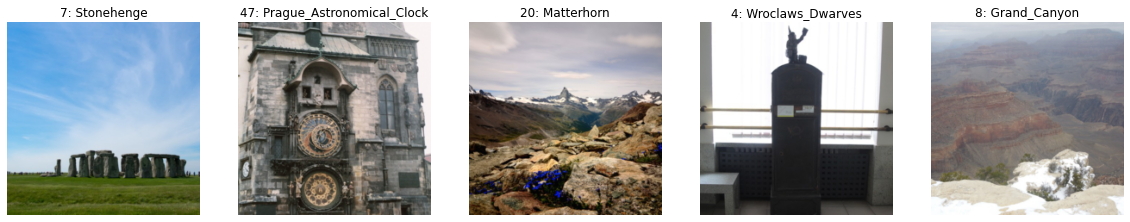

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader
## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)



np.random.seed(100)
indices = np.random.choice(range(len(labels)), size=5, replace=False)
plt.figure(figsize=(20,5))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    image = images[idx]
    # image = image*np.array(imagenet_std) + np.array(imagenet_std)
    # image = image.clip(0,1)
    plt.imshow(image);
    plt.title(f'{labels[idx]}: {landmark_mapping[labels[idx]]}');
    plt.axis("off")




### Initialize use_cuda variable

In [28]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [29]:
## TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    return optimizer
    
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [30]:
len(landmark_mapping)

50

In [31]:
# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self, ):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        #112
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        #56
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        #28
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

        

        fc_input_size = 14*14*128
        self.fc1 = nn.Linear(fc_input_size, 512)
        self.fc2 = nn.Linear(512, 50)
        self.dropout= nn.Dropout2d(p=0.5)
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        
        
    
    def forward(self, x):
        bs, in_channel, height, width = x.size()
        ## Define forward behavior
        # forward pass through first conv layer
        x = self.conv1(x)
        x = self.relu(x)
        x = self.max_pool(x)

        x = self.conv2(x)
        x = self.relu(x)
        x = self.max_pool(x)

        x = self.conv3(x)
        x = self.relu(x)
        x = self.max_pool(x)

        x = self.conv4(x)
        x = self.relu(x)
        x = self.max_pool(x)

        x = x.view(bs, -1)
        x = self.dropout(x)

        # forward pass through the linear layer for classification
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [32]:
images = next(iter(train_loader))

In [33]:
images[0].min(), images[0].max()

(tensor(0.), tensor(1.))

In [34]:
model_scratch(images[0].cuda()).size()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([32, 50])

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  

As this is image data, i have used 4 convoluational layer with varying number of channels, which can capture more features like boundaries, edges etc. I then flatten the output of the final layer to get feature representation, followed by dropout to avoid over-ftting. This is then passed through two linear layer for classificaiton, with a dropout layer in between.



### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [35]:
len(train_loader.sampler), len(valid_loader.sampler), len(test_loader.sampler), len(test_loader.dataset)

(3997, 999, 1250, 1250)

In [36]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        start_time = time()
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            train_loss += loss.data.item()*data.size(0)
            # print(f"idx: {batch_idx} Train Loss:{train_loss}")

            
        torch.cuda.empty_cache()
        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            out = model(data)
            loss = criterion(out, target)
            valid_loss += loss.data.item()*data.size(0) 
        train_loss = train_loss/ len(loaders['train'].sampler)
        valid_loss = valid_loss / len(loaders['valid'].sampler)

            
            
        end_time = time()
        time_taken = end_time - start_time
        # print training/validation statistics 
        print('Epoch: {} \t Time: {:.2f} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            time_taken,
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss < valid_loss_min:
            print(f"Valid loss reduced from {valid_loss_min :.6f} to {valid_loss :.6f}, saving model")
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)
              
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [37]:
import numpy as np
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    if isinstance(m, nn.Conv2d):
        n = m.kernel_size[0]*m.kernel_size[1]*m.in_channels
        y = 1 / np.sqrt(n)
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)
    elif isinstance(m, nn.Linear):
        y = 1/ np.sqrt(m.in_features)
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)

    
    

#-#-# Do NOT modify the code below this line. #-#-#
model_scratch = Net()
if use_cuda:
    model_scratch.cuda()
model_scratch.apply(custom_weight_init)
model_scratch = train(25, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	 Time: 63.33 	Training Loss: 1.943943 	Validation Loss: 3.771746
Valid loss reduced from inf to 3.771746, saving model
Epoch: 2 	 Time: 63.56 	Training Loss: 1.820305 	Validation Loss: 3.521374
Valid loss reduced from 3.771746 to 3.521374, saving model
Epoch: 3 	 Time: 63.56 	Training Loss: 1.691936 	Validation Loss: 3.346451
Valid loss reduced from 3.521374 to 3.346451, saving model
Epoch: 4 	 Time: 63.73 	Training Loss: 1.524878 	Validation Loss: 3.217870
Valid loss reduced from 3.346451 to 3.217870, saving model
Epoch: 5 	 Time: 63.99 	Training Loss: 1.344667 	Validation Loss: 3.191127
Valid loss reduced from 3.217870 to 3.191127, saving model
Epoch: 6 	 Time: 64.94 	Training Loss: 1.140474 	Validation Loss: 3.074947
Valid loss reduced from 3.191127 to 3.074947, saving model
Epoch: 7 	 Time: 67.22 	Training Loss: 0.958243 	Validation Loss: 3.162989
Epoch: 8 	 Time: 64.59 	Training Loss: 0.775703 	Validation Loss: 3.200770
Epoch: 9 	 Time: 65.72 	Training Loss: 0.606712 	Va

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [38]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 20

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	 Time: 63.29 	Training Loss: 1.960869 	Validation Loss: 3.889505
Valid loss reduced from inf to 3.889505, saving model
Epoch: 2 	 Time: 63.04 	Training Loss: 1.927329 	Validation Loss: 3.811366
Valid loss reduced from 3.889505 to 3.811366, saving model
Epoch: 3 	 Time: 62.69 	Training Loss: 1.875228 	Validation Loss: 3.691828
Valid loss reduced from 3.811366 to 3.691828, saving model
Epoch: 4 	 Time: 63.87 	Training Loss: 1.804556 	Validation Loss: 3.515881
Valid loss reduced from 3.691828 to 3.515881, saving model
Epoch: 5 	 Time: 65.44 	Training Loss: 1.693684 	Validation Loss: 3.447786
Valid loss reduced from 3.515881 to 3.447786, saving model
Epoch: 6 	 Time: 63.36 	Training Loss: 1.604546 	Validation Loss: 3.330289
Valid loss reduced from 3.447786 to 3.330289, saving model
Epoch: 7 	 Time: 64.23 	Training Loss: 1.543855 	Validation Loss: 3.297313
Valid loss reduced from 3.330289 to 3.297313, saving model
Epoch: 8 	 Time: 64.07 	Training Loss: 1.445938 	Validation Loss: 3

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [39]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))



In [40]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('ignore.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.883168


Test Accuracy: 30% (382/1250)


In [41]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.023806


Test Accuracy: 22% (282/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [42]:

train_transform = transforms.Compose([transforms.Resize(224),
                                      transforms.CenterCrop(224),                                      
                                      transforms.ToTensor(),
                                      transforms.Normalize(imagenet_mean, imagenet_std),
                                      ] 
                                     )

In [43]:
train_dataset = ImageFolder(train_dir, transform=train_transform)
test_dataset = ImageFolder(test_dir, transform=train_transform)

In [44]:
# Splitting train into train and valid
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.seed(100)
np.random.shuffle(indices)
split = int(np.floor(num_train*valid_size))
valid_idx, train_idx = indices[:split], indices[split:]
assert len(valid_idx) + len(train_idx) == num_train

# Creating Sampler
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# Creating data loader
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, num_workers=0)
valid_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=0)

In [45]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [46]:
## TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()


def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    return optim.SGD(model.parameters(), lr=0.001)    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [47]:
from torchvision.models import vgg19

In [48]:
## TODO: Specify model architecture

def get_transfer_model():
    model_transfer = vgg19(pretrained=True)
    for params in model_transfer.features.parameters():
        params.requires_grad=False

    in_features = model_transfer.classifier[6].in_features
    last_layer = nn.Linear(in_features, 50)
    model_transfer.classifier[6] = last_layer
    return model_transfer



model_transfer = get_transfer_model()
#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  I have taken one of the eassiest trainable network VGG19 for the task, also VGG19 is trained on ImageNet, which is a dataset containing 1000 classess, hence my assumption is even though Imagenet does not contains the same classess, the high level feature which would be sufficient for the task at hand. Given this I modeify the last linear layer and use it for classification.

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [49]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'
num_epochs = 20
model_transfer = train(num_epochs, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), 
                      criterion_transfer, use_cuda, 'model_transfer.pt')


#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	 Time: 79.68 	Training Loss: 1.813128 	Validation Loss: 3.287407
Valid loss reduced from inf to 3.287407, saving model
Epoch: 2 	 Time: 80.44 	Training Loss: 1.510282 	Validation Loss: 2.757273
Valid loss reduced from 3.287407 to 2.757273, saving model
Epoch: 3 	 Time: 80.35 	Training Loss: 1.256176 	Validation Loss: 2.327957
Valid loss reduced from 2.757273 to 2.327957, saving model
Epoch: 4 	 Time: 81.02 	Training Loss: 1.078639 	Validation Loss: 2.001274
Valid loss reduced from 2.327957 to 2.001274, saving model
Epoch: 5 	 Time: 80.28 	Training Loss: 0.922469 	Validation Loss: 1.762673
Valid loss reduced from 2.001274 to 1.762673, saving model
Epoch: 6 	 Time: 80.91 	Training Loss: 0.830870 	Validation Loss: 1.595952
Valid loss reduced from 1.762673 to 1.595952, saving model
Epoch: 7 	 Time: 80.19 	Training Loss: 0.762798 	Validation Loss: 1.478864
Valid loss reduced from 1.595952 to 1.478864, saving model
Epoch: 8 	 Time: 80.85 	Training Loss: 0.687791 	Validation Loss: 1

<All keys matched successfully>

In [50]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [51]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.972699


Test Accuracy: 74% (936/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [52]:
import cv2
from PIL import Image

In [68]:
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)
model_transfer = get_transfer_model()
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    transform = transforms.Compose([transforms.Resize(224),
                                    #   transforms.CenterCrop(224),                                      
                                      transforms.ToTensor(),
                                      transforms.Normalize(imagenet_mean, imagenet_std),
                                      ] 
                                     )
    img = Image.open(img_path)
    img = transform(img)
    img = torch.unsqueeze(img, 0)
    output = model_transfer(img)
    _, indx = torch.topk(output, k, 1)
    pred_label = []
    for idx in indx[0].numpy():
        pred_label.append(landmark_mapping[idx])
    

    return pred_label

    


# test on a sample image
print(predict_landmarks('/content/drive/MyDrive/nd101-c2-landmarks-starter/landmark_project/images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5))

['Golden_Gate_Bridge', 'Brooklyn_Bridge', 'Forth_Bridge', 'Sydney_Harbour_Bridge', 'Eiffel_Tower']


### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

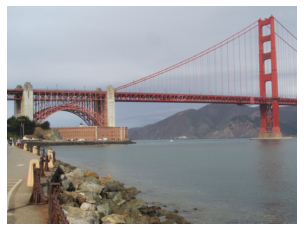

['Golden_Gate_Bridge', 'Brooklyn_Bridge', 'Forth_Bridge']

In [83]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    img = Image.open(img_path)
    plt.imshow(img);
    plt.axis("off")
    plt.show()
    return predicted_landmarks

    
    

# test on a sample image
suggest_locations('/content/drive/MyDrive/nd101-c2-landmarks-starter/landmark_project/images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ Output is much better than my expectation, infact one of the images (India Gate) class is not present in the training data and models top 3 suggestions is Gateway of India, which is not very bad prediction. For other 3, images top 3 prediction contains correct classes. 

Three possible improvements would be:
1. I have used VGG19, so instead of just learning weights of last layer, learning weights, we can expect better performance by fine tunning the weights of later layers of convoluational layer, as these layers represents contents of the image

2. As users take images at various angles, to fit the monuments in their camera, I can try some image agumentation technique like Horizontal flip, random rotation etc. I did not try them here because, in first section, image agumentation lead to poor results

3. We can also use other pre-trained network like ReseNet etc.



In [88]:
# image_dir = Path("/content/drive/MyDrive/nd101-c2-landmarks-starter/landmark_project/images/image")
image_dir = Path("../images/sample_images")

In [87]:
!pwd

/content/drive/My Drive/nd101-c2-landmarks-starter/landmark_project/landmark_images


In [89]:
images = [ image for image in image_dir.iterdir()]

In [90]:
images

[PosixPath('../images/sample_images/effiel_tower.jpg'),
 PosixPath('../images/sample_images/india_gate.jpg'),
 PosixPath('../images/sample_images/niagra_fall.jpg'),
 PosixPath('../images/sample_images/trevi_fountain.jpg')]

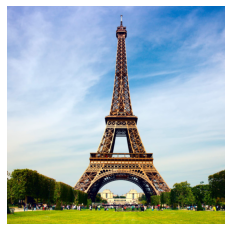

['Eiffel_Tower', 'Vienna_City_Hall', 'Terminal_Tower']
****************************************************************************************************


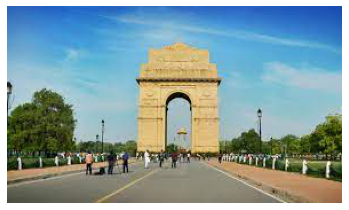

['Monumento_a_la_Revolucion', 'Gateway_of_India', 'Pont_du_Gard']
****************************************************************************************************


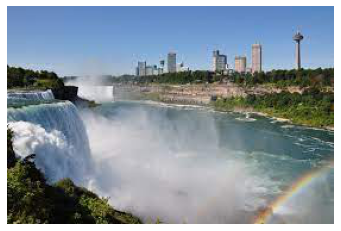

['Niagara_Falls', 'Gullfoss_Falls', 'Yellowstone_National_Park']
****************************************************************************************************


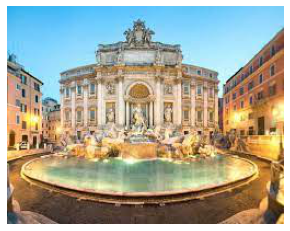

['Trevi_Fountain', 'Taj_Mahal', 'Vienna_City_Hall']
****************************************************************************************************


In [91]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.
for im in images:
    print(suggest_locations(im))
    print("*"*100)
